In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv('/content/car_purchasing.csv', encoding='ISO-8859-1')
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [14]:
df.drop(['customer name','customer e-mail','age','gender'],axis=1,inplace=True)

In [15]:
df.dtypes

country                 object
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['country']=label.fit_transform(df['country'])

In [17]:
df.head()

,country,annual Salary,credit card debt,net worth,car purchase amount
0,27,62812.09301,11609.380910,238961.2505,35321.45877
1,17,66646.89292,9572.957136,530973.9078,45115.52566
2,1,53798.55112,11160.355060,638467.1773,42925.70921
3,41,79370.03798,14426.164850,548599.0524,67422.36313
4,26,59729.15130,5358.712177,560304.0671,55915.46248


In [19]:
y=df['car purchase amount']
x=df.drop('car purchase amount',axis=1)

In [20]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

In [21]:
x

,country,annual Salary,credit card debt,net worth
0,27,62812.09301,11609.380910,238961.2505
1,17,66646.89292,9572.957136,530973.9078
2,1,53798.55112,11160.355060,638467.1773
3,41,79370.03798,14426.164850,548599.0524
4,26,59729.15130,5358.712177,560304.0671
...,...,...,...,...
495,128,71942.40291,6995.902524,541670.1016
496,208,56039.49793,12301.456790,360419.0988
497,144,68888.77805,10611.606860,764531.3203
498,24,49811.99062,14013.034510,337826.6382


In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [73]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
mod=Sequential()

In [74]:
mod.add(Flatten(input_shape=(xtrain.shape[1],)))
mod.add(Dense(units=12,activation='relu'))
mod.add(Dense(units=1,activation='linear'))

In [75]:
mod.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 4)                 0         
                                                                 
 dense_18 (Dense)            (None, 12)                60        
                                                                 
 dense_19 (Dense)            (None, 1)                 13        
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
mod.compile(optimizer='Adam',loss='mean_squared_error')

In [77]:
h=mod.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 173888144.0000 - accuracy: 0.0000e+00 - val_loss: 120462328.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 138767184.0000 - accuracy: 0.0000e+00 - val_loss: 101517752.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 128261640.0000 - accuracy: 0.0000e+00 - val_loss: 96439088.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 122867744.0000 - accuracy: 0.0000e+00 - val_loss: 91159632.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 114970152.0000 - accuracy: 0.0000e+00 - val_loss: 83488424.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 105083976.0000 - accuracy: 0.0000e+00 - val_loss: 76079536.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
1

In [78]:
h.history

{'loss': [173888144.0,
  138767184.0,
  128261640.0,
  122867744.0,
  114970152.0,
  105083976.0,
  96455568.0,
  90313824.0,
  85046496.0,
  80295984.0,
  76040128.0,
  72015208.0,
  68654912.0,
  66053796.0,
  62656280.0,
  60493168.0,
  58457744.0,
  57119836.0,
  55321340.0,
  54083332.0,
  52980904.0,
  52286768.0,
  51721624.0,
  51024604.0,
  50732256.0,
  50272672.0,
  49892040.0,
  49689968.0,
  49436708.0,
  49174124.0,
  48939892.0,
  48632872.0,
  48474648.0,
  48389380.0,
  47938980.0,
  48035632.0,
  47828768.0,
  47797436.0,
  47527112.0,
  47875268.0,
  47450272.0,
  47860056.0,
  47267196.0,
  47544060.0,
  47335404.0,
  47220996.0,
  47307608.0,
  47440024.0,
  47474396.0,
  47535440.0,
  47228812.0,
  47240756.0,
  47322444.0,
  47296036.0,
  47349200.0,
  47191648.0,
  47142204.0,
  47078588.0,
  47075440.0,
  47151396.0,
  47235420.0,
  47586688.0,
  47200820.0,
  46943268.0,
  47360112.0,
  47058628.0,
  47194520.0,
  46968136.0,
  47017496.0,
  47191040.0,
  4713

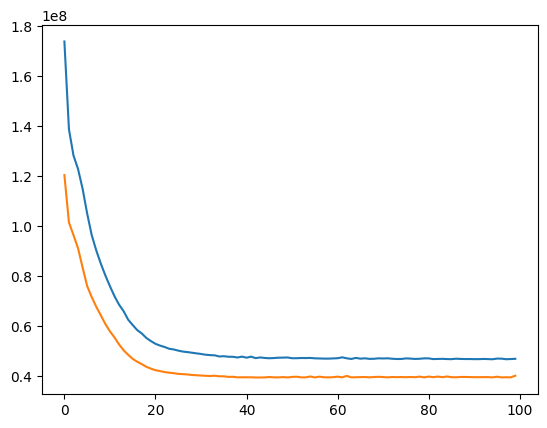

In [79]:
loss=h.history['loss']
val_loss=h.history['val_loss']
epoch=h.epoch
plt.plot(epoch,loss)
plt.plot(epoch,val_loss)